In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from scipy.stats import skew
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [2]:
df = pd.read_csv(r"C:\Users\rocks\OneDrive\Masaüstü\MachineLearning\Car_Prices.csv")

In [3]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [4]:
for col in df.columns:
    print(f"{col}: {df[col].dtypes}")

Car_Name: object
Make: object
Model: object
Make_Year: int64
Color: object
Body_Type: object
Mileage_Run: object
No_of_Owners: object
Seating_Capacity: int64
Fuel_Type: object
Fuel_Tank_Capacity(L): int64
Engine_Type: object
CC_Displacement: int64
Transmission: object
Transmission_Type: object
Power(BHP): float64
Torque(Nm): float64
Mileage(kmpl): object
Emission: object
Price: object


In [5]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [6]:
df["Mileage(kmpl)"] = df["Mileage(kmpl)"].str.split(" ", expand = True)[0]
df["Mileage(kmpl)"] = pd.to_numeric(df["Mileage(kmpl)"], errors='coerce')
df["Mileage(kmpl)"] = df["Mileage(kmpl)"].fillna(df["Mileage(kmpl)"].mean()).astype("float64")

In [7]:
df["Mileage_Run"] = df["Mileage_Run"].str.replace(",", ".").astype("float64")

In [8]:
df["Mileage_Run"].dtype

dtype('float64')

In [9]:
for col in df.select_dtypes(include=["object", "category"]):
    print(f"{col}: {df[col].nunique()}")

Car_Name: 376
Make: 16
Model: 87
Color: 15
Body_Type: 5
No_of_Owners: 3
Fuel_Type: 3
Engine_Type: 143
Transmission: 5
Transmission_Type: 2
Emission: 3
Price: 585


In [10]:
df["Price"] = df["Price"].str.replace("," , "", regex = True).astype("int64")
df["Price"] = df["Price"] / 88.52 # The reason we are dividing the data by this value is that the data is originally in Indian Rupees. We are converting it to Euros for easier evaluation and comparison going forward.
df["Price"] = df["Price"].astype("int64")

In [11]:
df["Price"].dtype

dtype('int64')

In [12]:
df.describe().T.style.background_gradient(cmap = "gist_rainbow")

,count,mean,std,min,25%,50%,75%,max
Make_Year,976.000000,2016.963115,2.818742,2011.000000,2015.000000,2017.000000,2019.000000,2022.000000
Mileage_Run,976.000000,41.571196,24.390995,1.117000,22.676750,37.570500,57.421250,99.495000
Seating_Capacity,976.000000,5.095287,0.446224,4.000000,5.000000,5.000000,5.000000,8.000000
Fuel_Tank_Capacity(L),976.000000,42.283811,8.074549,15.000000,37.000000,42.000000,45.000000,70.000000
CC_Displacement,976.000000,1301.155738,276.867533,624.000000,1197.000000,1198.000000,1497.000000,2179.000000
Power(BHP),976.000000,91.325758,25.713275,34.000000,74.720000,83.325000,105.940000,177.000000
Torque(Nm),976.000000,144.381045,66.780511,48.000000,110.000000,114.000000,158.000000,380.000000
Mileage(kmpl),976.000000,19.598881,3.829250,10.400000,17.410000,18.900000,21.010000,105.000000
Price,976.000000,8370.720287,4149.610903,2123.000000,5374.250000,7529.000000,9975.000000,33224.000000


In [13]:
num_cols = [col for col in df.columns if df[col].nunique() > 12 and df[col].dtype in ["float64", "int64"]]
num_df = df[num_cols]  
for col in num_cols:
    print(f"{col}: Contains NaN values = {df[col].isna().any()}")

Mileage_Run: Contains NaN values = False
Fuel_Tank_Capacity(L): Contains NaN values = False
CC_Displacement: Contains NaN values = False
Power(BHP): Contains NaN values = False
Torque(Nm): Contains NaN values = False
Mileage(kmpl): Contains NaN values = False
Price: Contains NaN values = False


# EXAMINE THE DATA USING A SCATTER PLOT FOR A SUMMARY OVERVIEW

- We are excluding the 'Car_Name' column from our graph because the information in 'Car_Name' almost directly correlates with the information in the 'Make' and 'Model' columns. Therefore, omitting this column prevents redundancy and increases the efficiency of the graph.

To perform a more detailed analysis of our dataset, we are generating a series of scatter plots. These plots will visualize the relationship between our target variable 'Price' and the other features. For this, we are using the Plotly library and a 'for' loop.

For each scatter plot, we check whether the values on the X-axis are numerical. If they are numerical, we include the correlation value between that feature and 'Price' as the title. The correlation value shows the strength and direction of the relationship between these two features. If the variable on the X-axis is categorical, we simply include the name of the variable as the title.

This method allows us to get a general picture of how each feature correlates with 'Price'. In this way, we can gain preliminary insights about our dataset and conduct a more effective data analysis process.

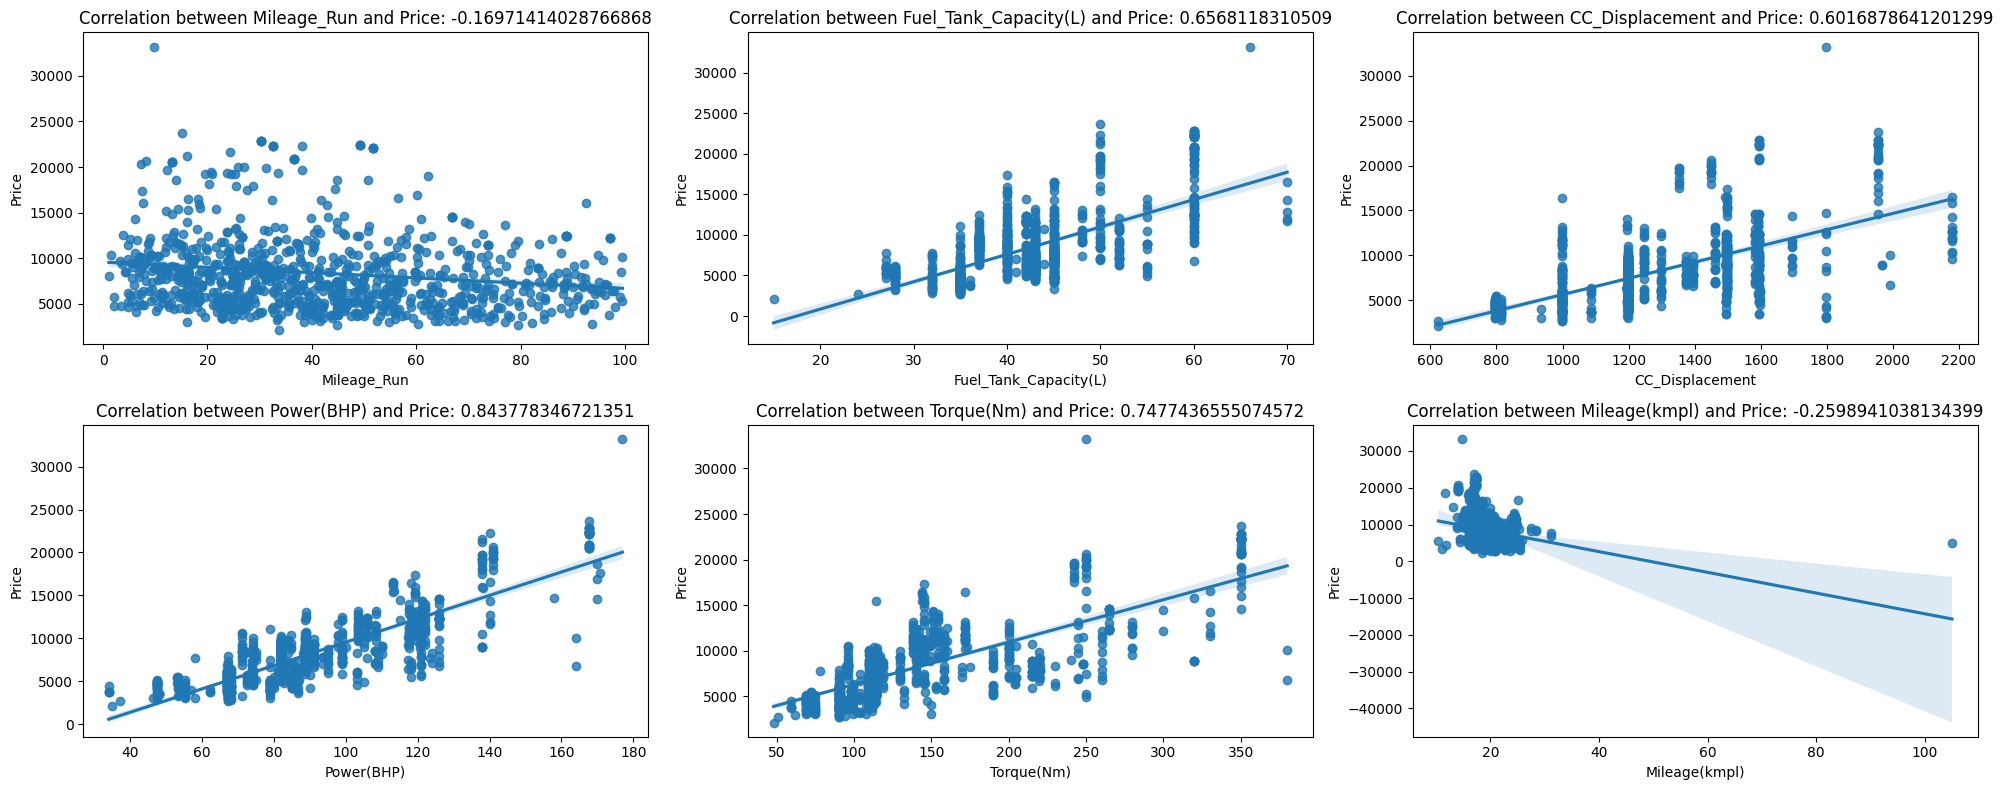

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 8))

row = 0
col = 0

for feature in df[num_cols]:
    if feature == 'Price':
        continue

    sns.regplot(x = df[feature], y = df['Price'], ax = axes[row, col])
    axes[row, col].set_title(f"Correlation between {feature} and Price: {df[feature].corr(df['Price'])}")

    col += 1
    if col > 2:
        col = 0
        row += 1

plt.tight_layout()
plt.show()

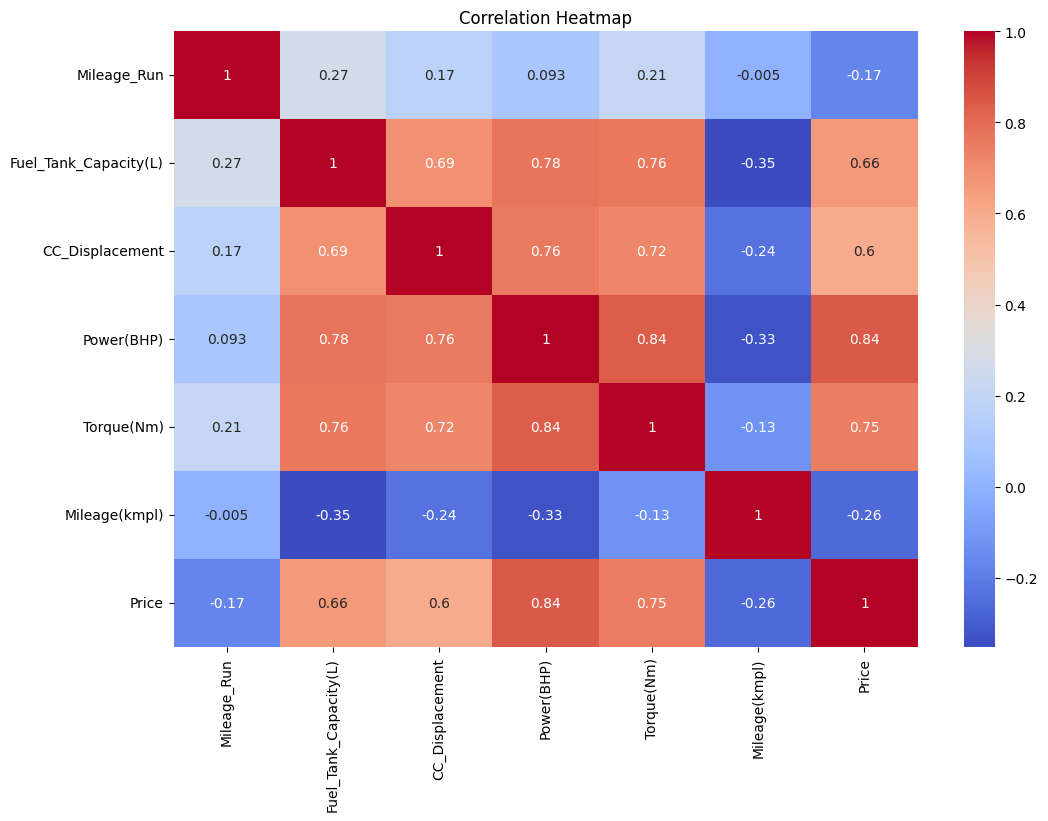

In [15]:
corr_matrix = df[num_cols].corr()
mask = np.tril(np.ones_like(corr_matrix, dtype = bool))
masked_corr = np.where(mask, corr_matrix.values, np.nan)

plt.figure(figsize = (12, 8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

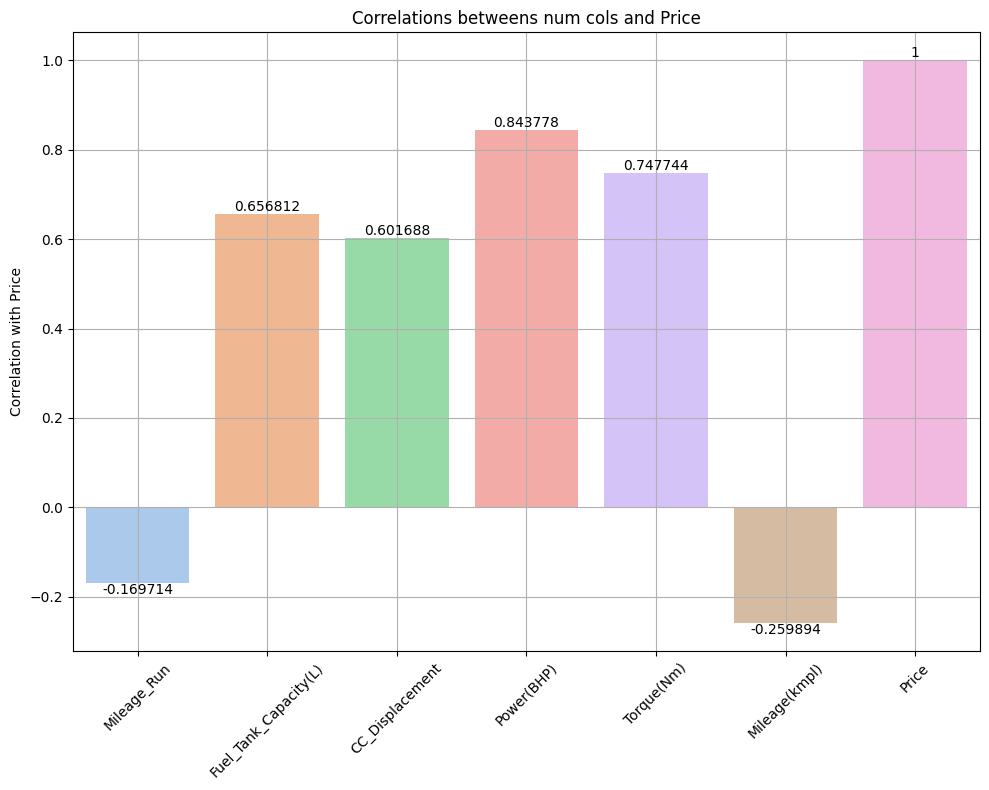

In [16]:
correlations = df[num_cols].corrwith(df["Price"])
plt.figure(figsize=(10,8))
ax = sns.barplot(x = correlations.index, y = correlations.values, palette= "pastel")
for container in ax.containers:
                  ax.bar_label(container)
plt.xticks(rotation = 45)
plt.grid(True)
plt.title("Correlations betweens num cols and Price")
plt.ylabel("Correlation with Price")
plt.tight_layout()
plt.show()

We decided to remove the 'Torque(Nm)' feature from our dataset because it carried almost identical information as 'Power(BHP)', and these two variables had a high correlation of 84%. Such high collinearity could potentially introduce problems in our model. Given that 'Power(BHP)' had a higher degree of correlation with our target variable 'Price', we chose to retain 'Power(BHP)' and eliminate 'Torque(Nm)' to improve the model's predictive performance.

In [17]:
df = df.drop("Torque(Nm)", axis = 1)

# Label Encoder

In [18]:
encoded_cols = [col for col in df.columns if df[col].dtypes in ["object", "category"] and df[col].nunique() < 20]

encoded_df = pd.get_dummies(df[encoded_cols], drop_first = True)

df = df.drop(encoded_cols, axis = 1).join(encoded_df)

df = df.replace({True : 1 , False : 0})

# Assessing Skewness of Each Numeric Variable

Skewness can sometimes pose challenges in machine learning models, particularly those that operate more efficiently on normally-distributed data such as linear regression, logistic regression, and support vector machines. Skewed data can hinder the learning process of the model and potentially degrade prediction accuracy.

Whether or not skewness should be corrected often depends on the type of data and the model in question. Generally speaking, if the skewness value falls between -0.5 and 0.5, the data is considered to be fairly symmetric. If the value is between -1 and -0.5 or 0.5 and 1, then the data is moderately skewed. A skewness value below -1 or above 1 indicates that the data is highly skewed and might require correction.

Various techniques exist for correcting skewness, such as log transformations, square root transformations, and Box-Cox transformations. These techniques can normalize the data distribution, thereby improving the performance of machine learning models.

However, it's crucial to note that these techniques aren't universally applicable. For example, log transformations are only suitable for positive values. Therefore, the choice of the technique to correct skewness should be made based on the specific characteristics of the data.

The process of correcting skewness involves analyzing the data, identifying an appropriate transformation technique, and applying it. After the transformation, it's important to reassess the skewness to ensure that the data distribution has been effectively normalized.

In summary, the process of correcting skewness is of critical importance for the successful operation of machine learning models, and data scientists must have a good understanding of this process.

This refined version should provide a clearer and more comprehensive overview of the subject.

The following code snippet is used to calculate and visualize the skewness ratios of the numerical columns in the dataset. First, we create a list called num_cols. This list contains columns from the dataset that have more than 12 unique values and have data types either 'float64' or 'int64'. In other words, this list primarily consists of continuous variables.

Next, we use the plt.figure() function to set up a plot, which is designed to display skewness ratios in the form of a bar graph. The bar graph is generated with the expression df[num_cols].apply(lambda x: skew(x)).plot(kind = "bar"). This expression calculates the skewness value for each continuous variable and visualizes them in a bar graph.

Above the bars in the bar graph, there are labels that indicate the skewness value for each bar. These labels are added using the expression ax.bar_label(bars).

Lastly, the title of the graph is set to 'Skewness Rates by each columns,' and the graph is displayed on the screen.

This code snippet enables quick and effective analysis of the skewness of continuous variables in the dataset. Skewness values serve as an important tool for understanding how closely the distribution of each variable aligns with normality.

This translation should provide a clear and detailed explanation of what the code snippet is doing and why it's useful.

In [19]:
num_cols.remove("Torque(Nm)")

df[num_cols].skew()

Mileage_Run              0.51
Fuel_Tank_Capacity(L)    0.73
CC_Displacement          0.61
Power(BHP)               0.93
Mileage(kmpl)           11.49
Price                    1.61
dtype: float64

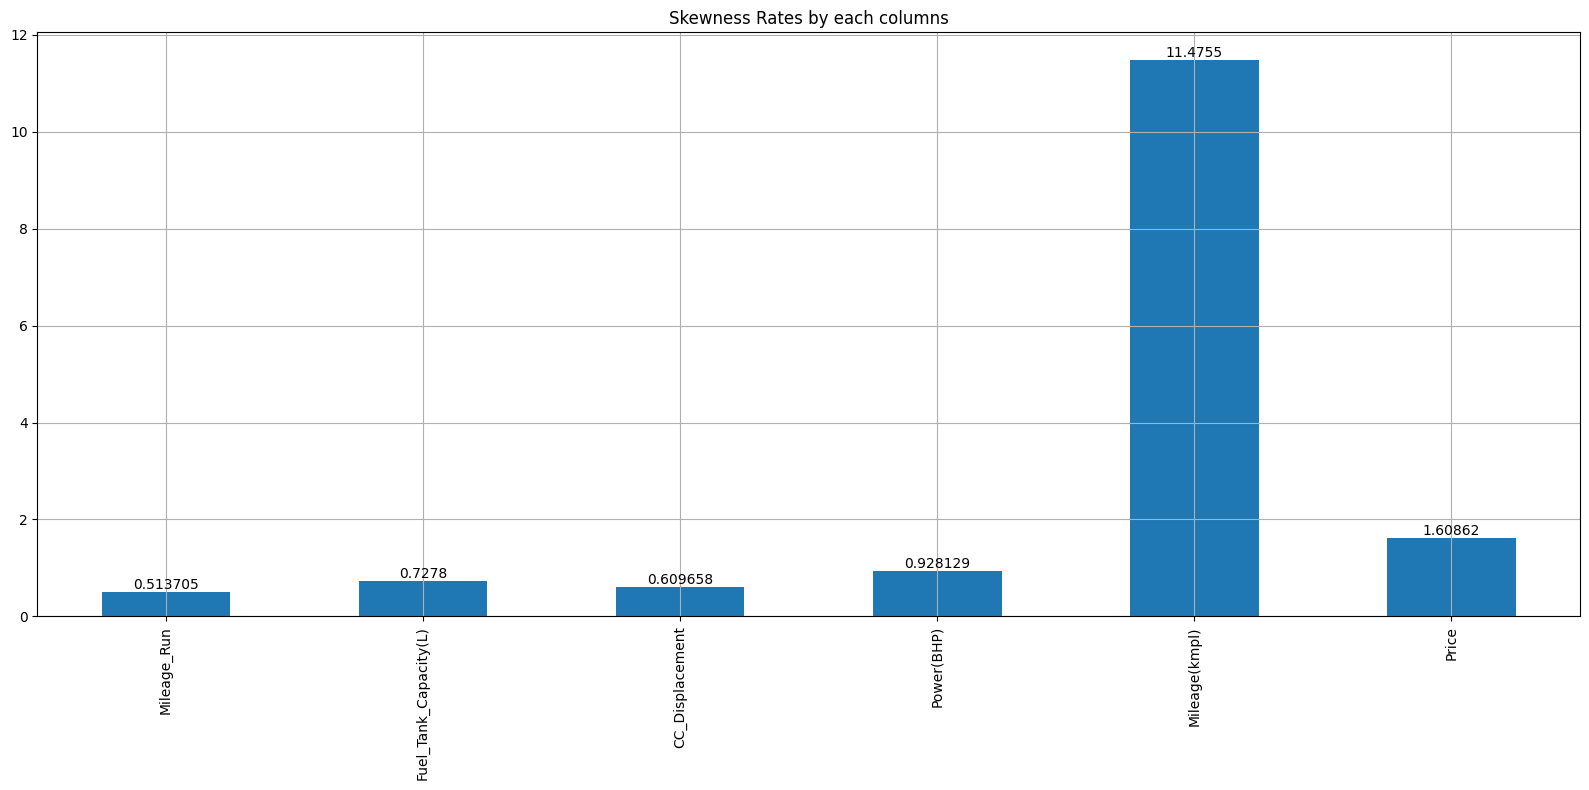

In [20]:
plt.figure(figsize=(16,8))
ax = df[num_cols].apply(lambda x: skew(x)).plot(kind = "bar")
ax.grid(True)
bars = ax.containers[0]
ax.bar_label(bars)
plt.title("Skewness Rates by each columns")
plt.tight_layout()
plt.show()

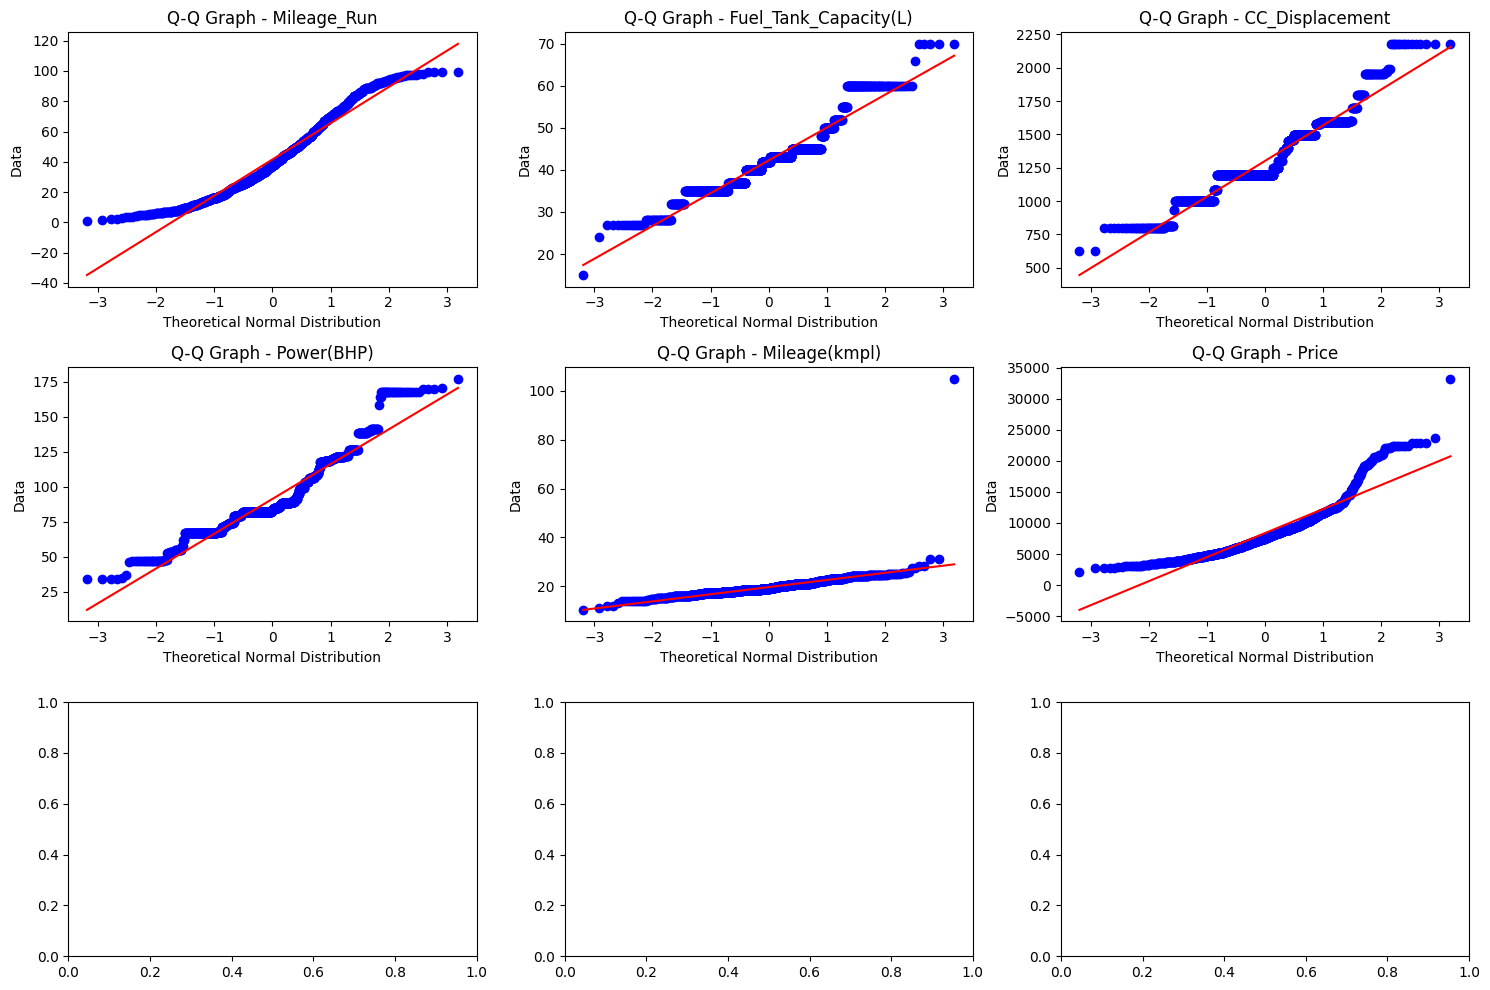

In [21]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
flat_axes = axes.flatten()

for ax, col in zip(flat_axes, df[num_cols]):
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Graph - {col}")
    ax.set_xlabel("Theoretical Normal Distribution")
    ax.set_ylabel("Data")

plt.tight_layout()
plt.show()

In [22]:
for col in num_cols:
    print(f"{col}: Min value = {df[col].min()}")

Mileage_Run: Min value = 1.117
Fuel_Tank_Capacity(L): Min value = 15
CC_Displacement: Min value = 624
Power(BHP): Min value = 34.0
Mileage(kmpl): Min value = 10.4
Price: Min value = 2123


# Machine Learning

At this stage, we will construct three different models to evaluate their performance. First, we'll try a model without applying any regularization. Second, we'll build a model using Box-Cox transformation, and finally, we'll create a model incorporating log transformation.

To gauge the performance of each model, we will use R-squared (r2) and Mean Squared Error (MSE) metrics. These two metrics help us understand how well the model fits the data and how far off its predictions are from the actual values. Based on these evaluations, we will decide which model demonstrates the best performance. This decision will guide us in choosing which dataset to proceed with for further analysis.

In [23]:
df.head()

,Car_Name,Model,Make_Year,Mileage_Run,Seating_Capacity,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Power(BHP),Mileage(kmpl),Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,Make_Nissan,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Color_black,Color_blue,Color_bronze,Color_brown,Color_golden,Color_green,Color_grey,Color_maroon,Color_orange,Color_purple,Color_red,Color_silver,Color_white,Color_yellow,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual,Emission_BS IV,Emission_BS V
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Ameo,2017,44.61,5,45,1.5L TDI Engine,1498,109.00,21.66,7422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,Hyundai i20 Active [2015-2020] 1.2 SX,i20 Active,2016,20.30,5,45,1.2L Kappa 5 Speed Manual Transmission,1197,82.00,17.19,7704,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
2,Honda WR-V VX i-VTEC,WR-V,2019,29.54,5,40,i-VTEC Petrol engine,1199,88.50,16.50,8958,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0
3,Renault Kwid 1.0 RXT AMT,Kwid,2017,35.68,5,28,1.0L,999,67.00,21.70,4676,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Grand i10,2017,25.13,5,43,Kappa VTVT Petrol Engine,1197,81.86,18.90,5817,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1


In [24]:
df = df.drop(["Car_Name", "Engine_Type", "Model"], axis = 1)
X = df.drop("Price", axis = 1)
y = df["Price"]

# Witout Regulirazition Regression

In [25]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

print("Standard model r2 is : ", r2)
print("Standard model mse is : ", mse)
print("Standard model mean transformed model mse is : ", mae)

Standard model r2 is :  0.8374982035664025
Standard model mse is :  2329076.7696410413
Standard model mean transformed model mse is :  1034.088048039717


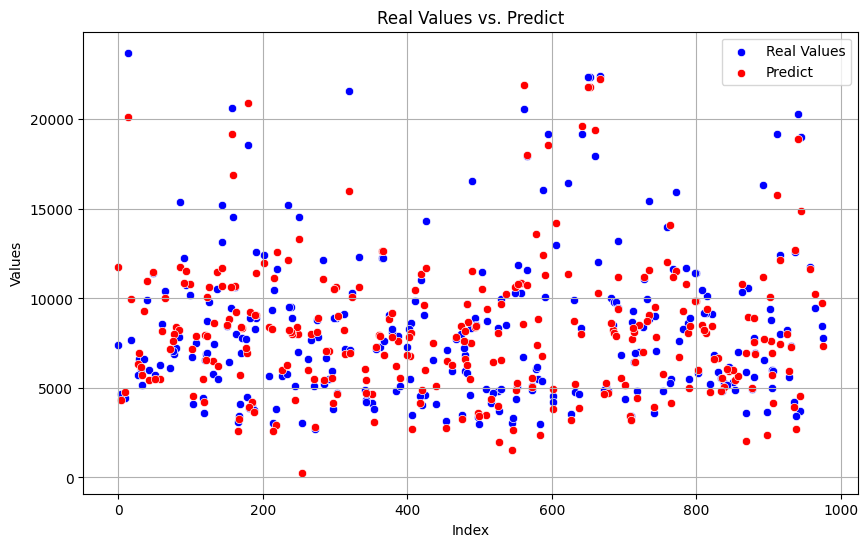

In [26]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# With Box-cox 

In [27]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

y_train_bc, lambda_bc = boxcox(y_train)

model = LinearRegression()
model.fit(X_train, y_train_bc)

y_pred_bc_transformed = model.predict(X_test)

y_pred_bc = inv_boxcox(y_pred_bc_transformed, lambda_bc)

r2_bc_transformed = r2_score(y_test, y_pred_bc)
mse_bc_transformed = mean_squared_error(y_test, y_pred_bc)
mae_bc_transformed = mean_absolute_error(y_test, y_pred_bc)

print("Box-Cox transformed r2 is : ", r2_bc_transformed)
print("Box-Cox transformed model mse is : ", mse_bc_transformed)
print("Box-cox mean transformed model mse is : ", mae_bc_transformed)

Box-Cox transformed r2 is :  0.8573472190690328
Box-Cox transformed model mse is :  2428597.4202485615
Box-cox mean transformed model mse is :  977.6386127986169


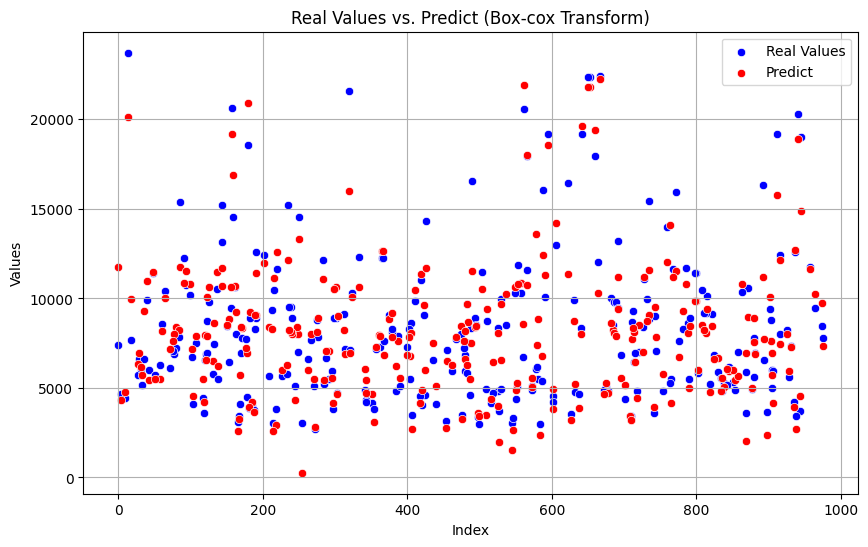

In [28]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict (Box-cox Transform)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# LOG Transformation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

y_train_log = np.log(y_train)

model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred_log_transformed = model.predict(X_test)

y_pred_log = np.exp(y_pred_log_transformed)

r2_log_transformed = r2_score(y_test, y_pred_log)
mse_log_transformed = mean_squared_error(y_test, y_pred_log)
mae_log_transformed = mean_absolute_error(y_test, y_pred_log)

print("Log transformed r2 is : ", r2_log_transformed)
print("Log transformed model mse is : ", mse_log_transformed)
print("Log mean transformed model mse is : ", mae_log_transformed)

Log transformed r2 is :  0.8943260246110156
Log transformed model mse is :  1799050.4099691613
Log mean transformed model mse is :  936.9460569064127


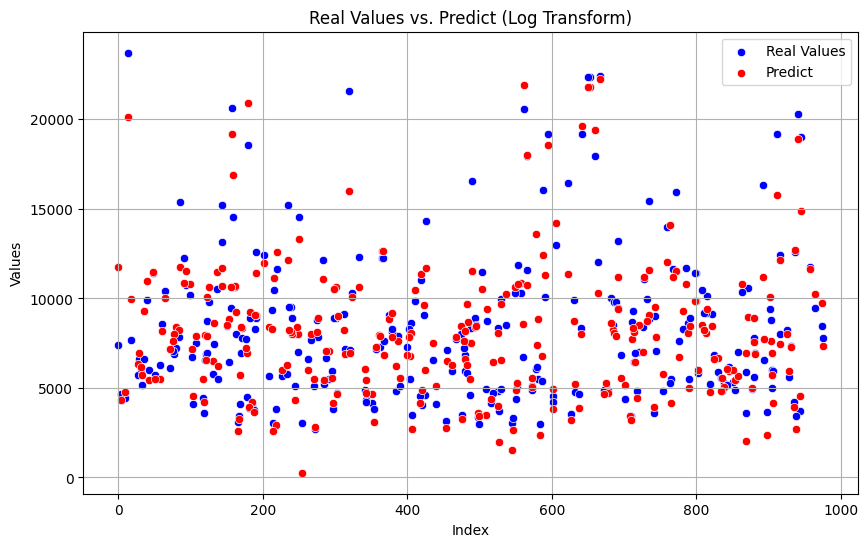

In [30]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict (Log Transform)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

We evaluated our model in three different ways, and the summarized results are as follows:

<code> Without any regularization techniques </code>

- MSE: 2,329,076
- R2: 0.83

<code> With BOX-COX Transformation </code>

- MSE: 2,428,597
- R2: 0.85

<code> With LOG Transformation </code>

- MSE: 1,799,050
- R2: 0.89

As can be seen from the results, the Log transformation yields the best performance. Moving forward, we will continue with the Log transformation approach.

# MODEL SELECTION

# RİDGE

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

y_train_log = np.log(y_train)

model = Ridge(alpha = 10)
model.fit(X_train, y_train_log)

y_pred_log_transformed = model.predict(X_test)

y_pred_log = np.exp(y_pred_log_transformed)

r2_log_transformed = r2_score(y_test, y_pred_log)
mse_log_transformed = mean_squared_error(y_test, y_pred_log)
mae_log_transformed = mean_absolute_error(y_test, y_pred_log)

print("Ridge model r2 is : ", r2_log_transformed)
print("Ridge model mse is : ", mse_log_transformed)
print("Ridge model mae is : ", mae_log_transformed)

Ridge model r2 is :  0.9025266530961459
Ridge model mse is :  1659438.514193767
Ridge model mae is :  936.3833807523159


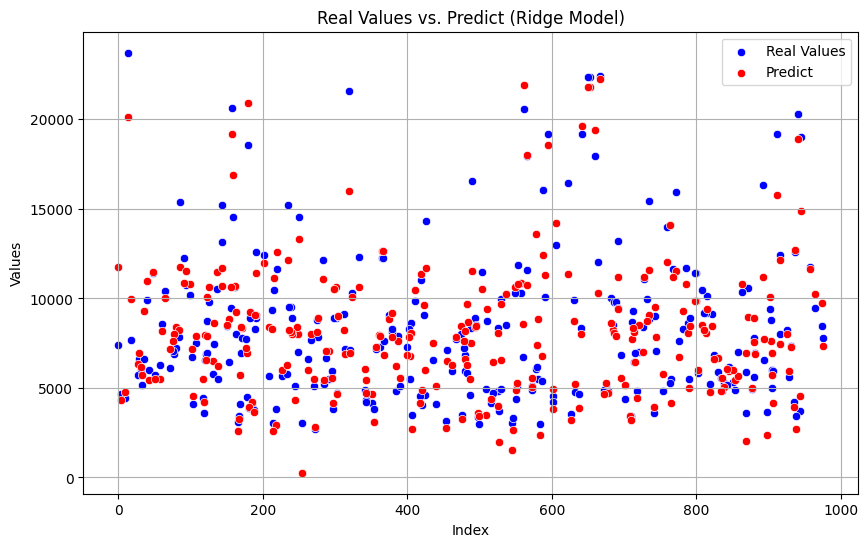

In [32]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict (Ridge Model)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# LASSO

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

y_train_log = np.log(y_train)

model = Lasso()
model.fit(X_train, y_train_log)

y_pred_log_transformed = model.predict(X_test)

y_pred_log = np.exp(y_pred_log_transformed)

r2_log_transformed = r2_score(y_test, y_pred_log)
mse_log_transformed = mean_squared_error(y_test, y_pred_log)
mae_log_transformed = mean_absolute_error(y_test, y_pred_log)

print("Lasso model transformed r2 is : ", r2_log_transformed)
print("Lasso model mse is : ", mse_log_transformed)
print("Lasso model mae is : ", mae_log_transformed)

Lasso model transformed r2 is :  0.7348881901187112
Lasso model mse is :  4513405.580692451
Lasso model mae is :  1655.971138630167


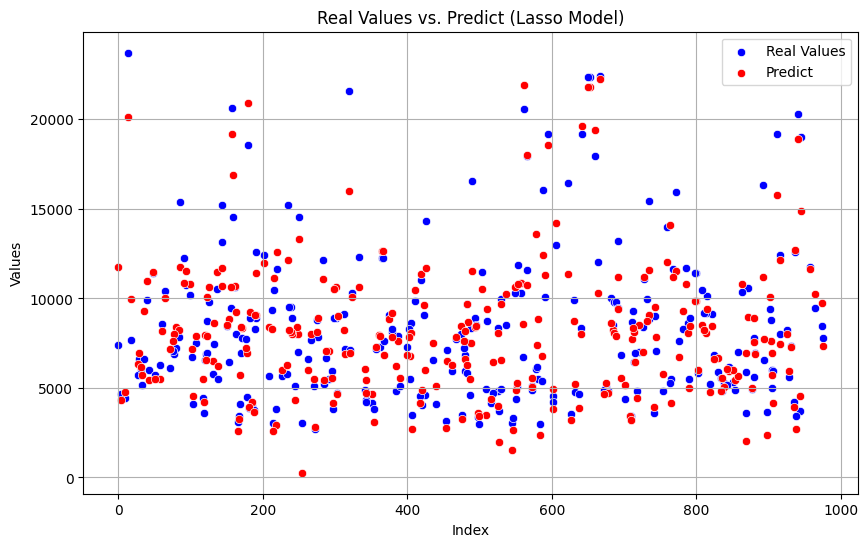

In [34]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict (Lasso Model)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

We've tested two different regression models, and Ridge regression provided the best results. Now let's make our final hyperparameter adjustments by trying polynomial features, and then finalize our model using GridSearch and Cross-Validation (CV).

# RIDGE WITH POLINOM

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

y_train_log = np.log(y_train)

model = Ridge(alpha = 10)
model.fit(X_train_poly, y_train_log)

y_pred_log_transformed = model.predict(X_test_poly)

y_pred_log = np.exp(y_pred_log_transformed)

r2_log_transformed = r2_score(y_test, y_pred_log)
mse_log_transformed = mean_squared_error(y_test, y_pred_log)

print("Log transformed r2 with polynomial features is : ", r2_log_transformed)
print("Log transformed model mse with polynomial features is : ", mse_log_transformed)

Log transformed r2 with polynomial features is :  0.8216422876341393
Log transformed model mse with polynomial features is :  3036457.314791356


Adding polynomial features didn't yield the desired results. However, we will still look into polynomial degrees while performing GridSearch, as using a degree higher than 2 may improve our model's performance.

# Conclusion

As we can see, Ridge Regression yielded the best results for us. Now that we've identified our model, let's proceed to fine-tune its hyperparameters using Grid Search and Cross-Validation.

# Grid Search - CV

In [36]:
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

pipeline = make_pipeline(PolynomialFeatures(), Ridge())

param_grid = {'polynomialfeatures__degree' : [1, 2, 3], 'ridge__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_model = GridSearchCV(pipeline, param_grid, cv = 5)

y_train_log = np.log(y_train)

grid_model.fit(X_train, y_train_log)

print('Best parameters : ', grid_model.best_params_)

y_pred_log_transformed = grid_model.predict(X_test)

y_pred = np.exp(y_pred_log_transformed)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Grid model r2 with optimal polynomial features is : ", r2)
print("Grid model mse with optimal polynomial features is : ", mse)
print("Grid model mae is : ", mae)

c:\Users\rocks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rocks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rocks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rocks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rocks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singul

Best parameters :  {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1}
Grid model r2 with optimal polynomial features is :  0.895549362038622
Grid model mse with optimal polynomial features is :  1778223.6577573265
Grid model mae is :  933.0325304755783


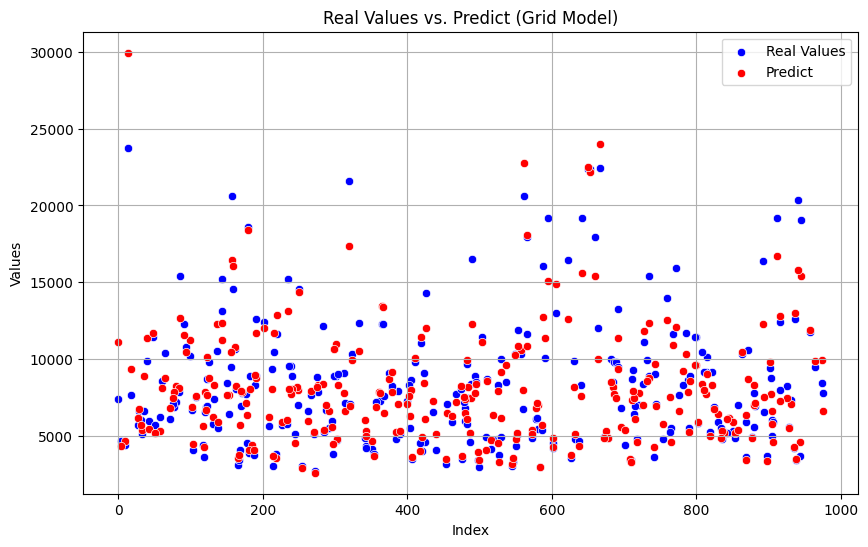

In [37]:
compare = pd.DataFrame({"Real Values" : y_test, "Predict" : y_pred})
compare_reset = compare.reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data = compare_reset, x = 'index', y = 'Real Values', label = 'Real Values', color = 'blue')
sns.scatterplot(data = compare_reset, x = 'index', y = 'Predict', label = 'Predict', color = 'red')

plt.title('Real Values vs. Predict (Grid Model)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# COMPARASION OF TRAINING AND TESTING ERROR

In [38]:
y_pred_log_transformed_train = grid_model.predict(X_train)
y_pred_train = np.exp(y_pred_log_transformed_train)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("Test set R2 Score:", r2)
print("Test set MSE:", mse)

print("Training set R2 Score:", r2_train)
print("Training set MSE:", mse_train)

Test set R2 Score: 0.895549362038622
Test set MSE: 1778223.6577573265
Training set R2 Score: 0.9403802860692858
Training set MSE: 1028936.9265252412


Looking at both our test and training errors, the results are very promising. This serves as a strong indication that our model is not overfitting.

# OUTLIER DETECTION

First, let's check for outlier values using a seaborn boxplot.

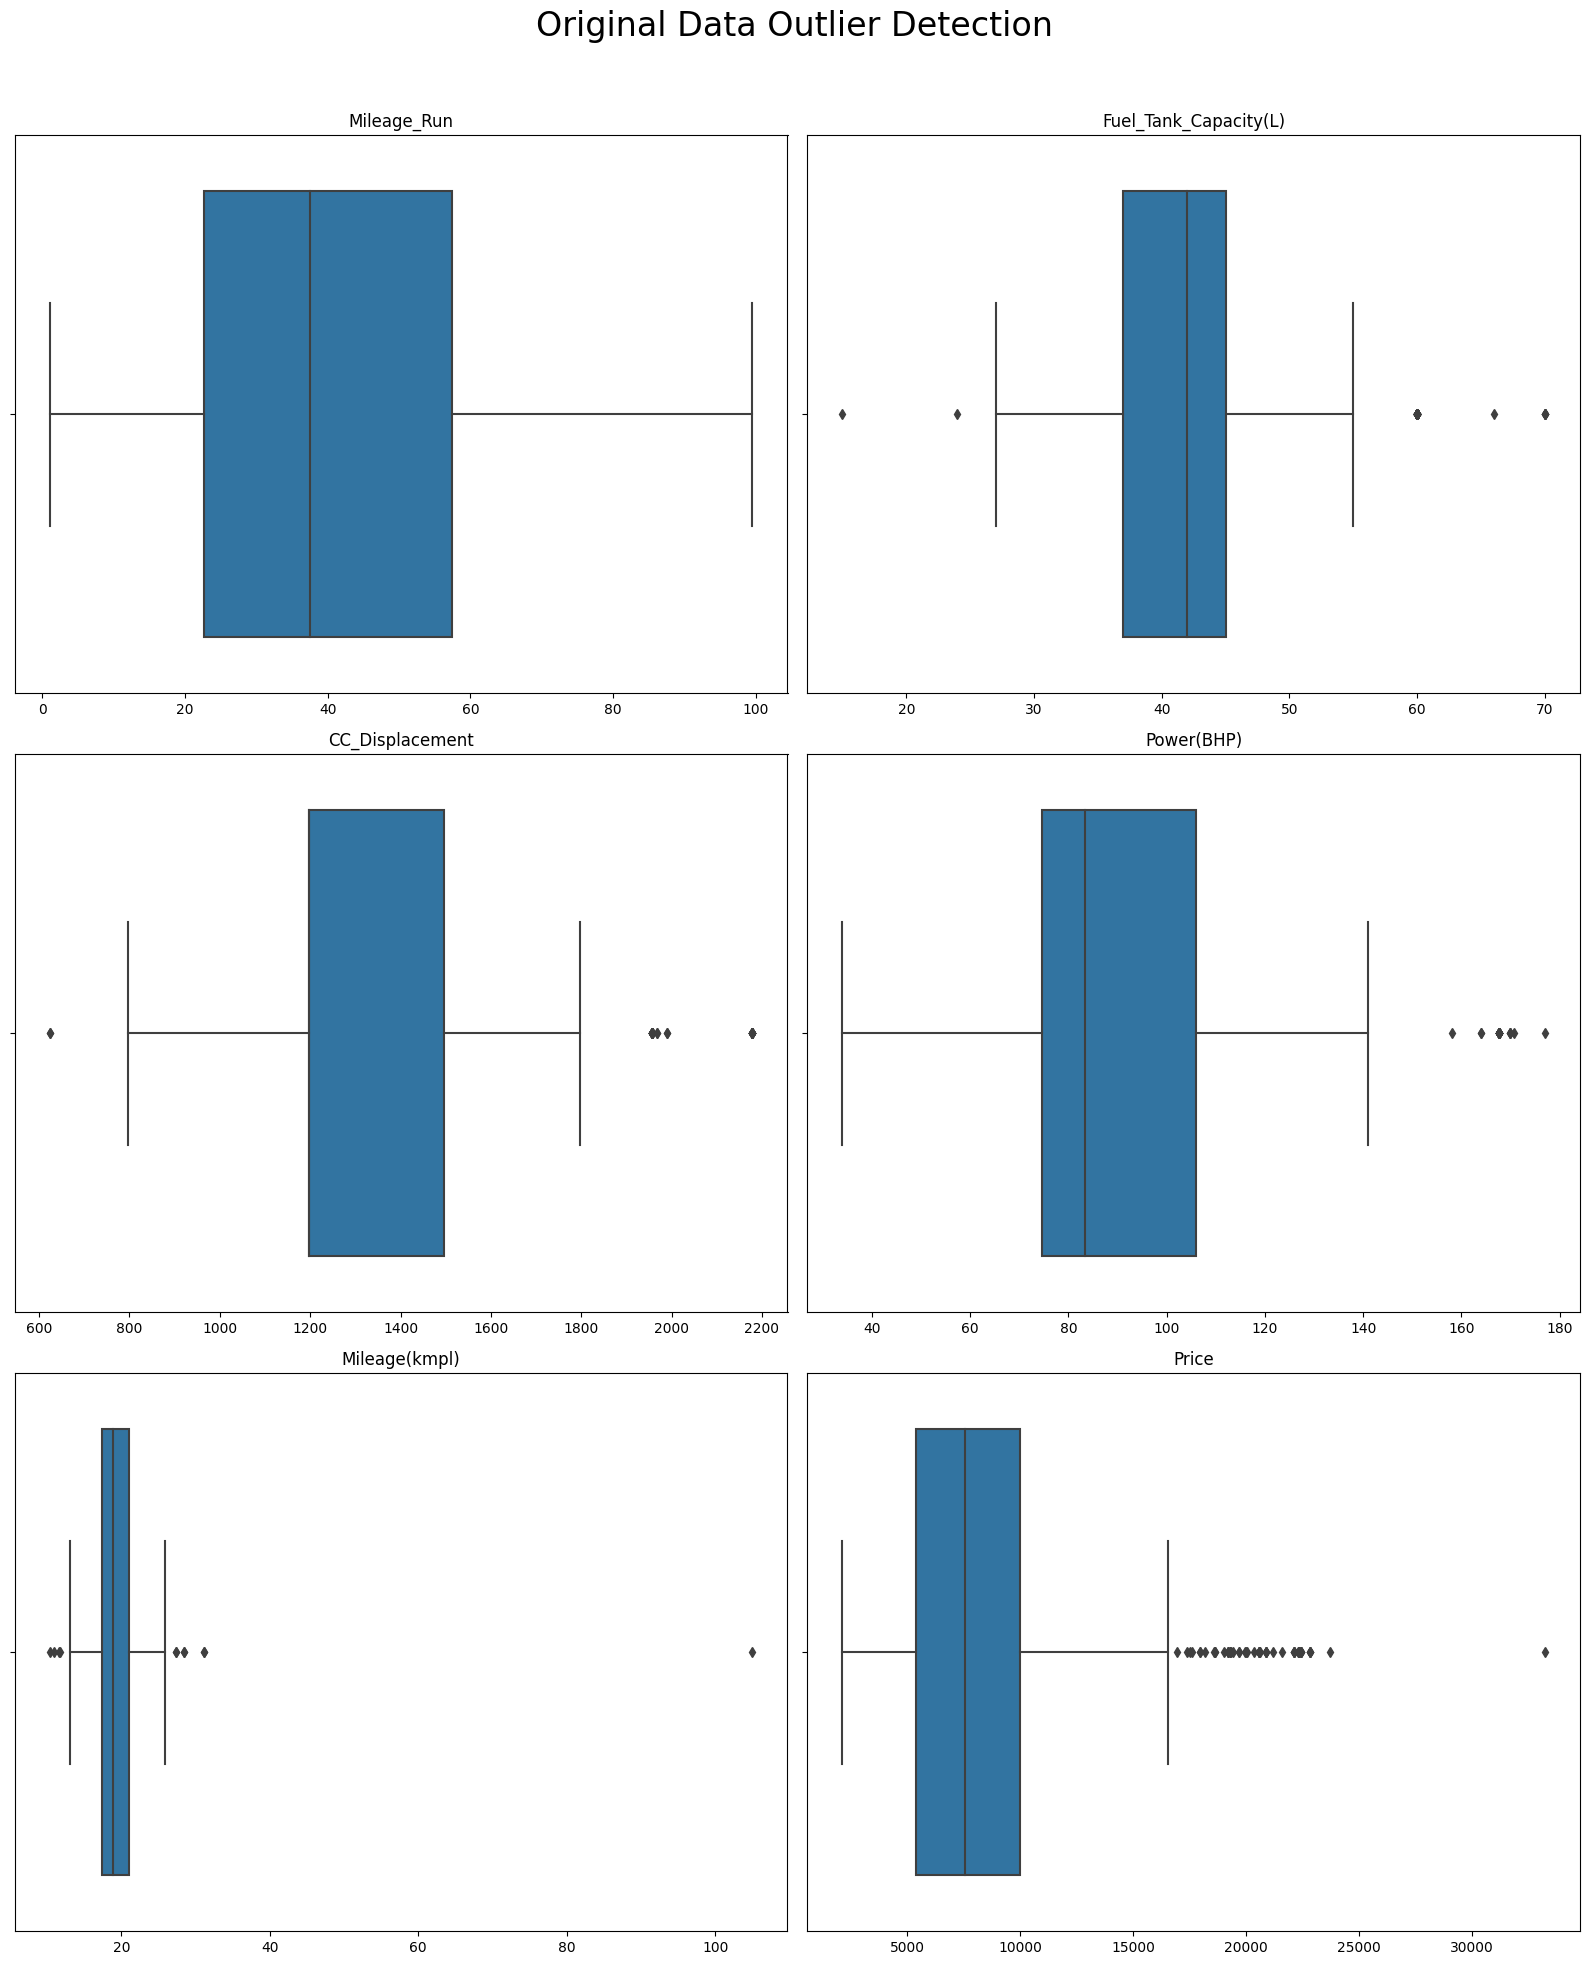

In [39]:
num_cols = [col for col in df.columns if df[col].nunique() > 12 and df[col].dtype in ["float64", "int64"]]

fig, axes = plt.subplots(3, 2, figsize=(16, 20))

for i, feature in enumerate(num_cols):
    row = i // 2
    col = i % 2
    
    sns.boxplot(x = df[feature], ax = axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

fig.suptitle("Original Data Outlier Detection", fontsize = 24)
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

As we can see from the graph above, we have outliers in our data. Let's try to reduce these outliers using the z-score method.

In [40]:
X = df.drop("Price", axis=1)

z_scores = np.abs((X - X.mean()) / X.std())

threshold = 2

outliers = X[(z_scores > threshold).any(axis=1)]

X_without_outliers = X.copy()

num_cols = [col for col in X_without_outliers.columns if df[col].dtypes in ["float64", "int64"] and X_without_outliers[col].nunique() > 12]

for col in num_cols:
    median_val = X[col].median()
    X_without_outliers[col] = X_without_outliers[col].mask(z_scores[col] > threshold, median_val)

df_without_outliers = X_without_outliers.copy()
df_without_outliers['Price'] = df['Price']

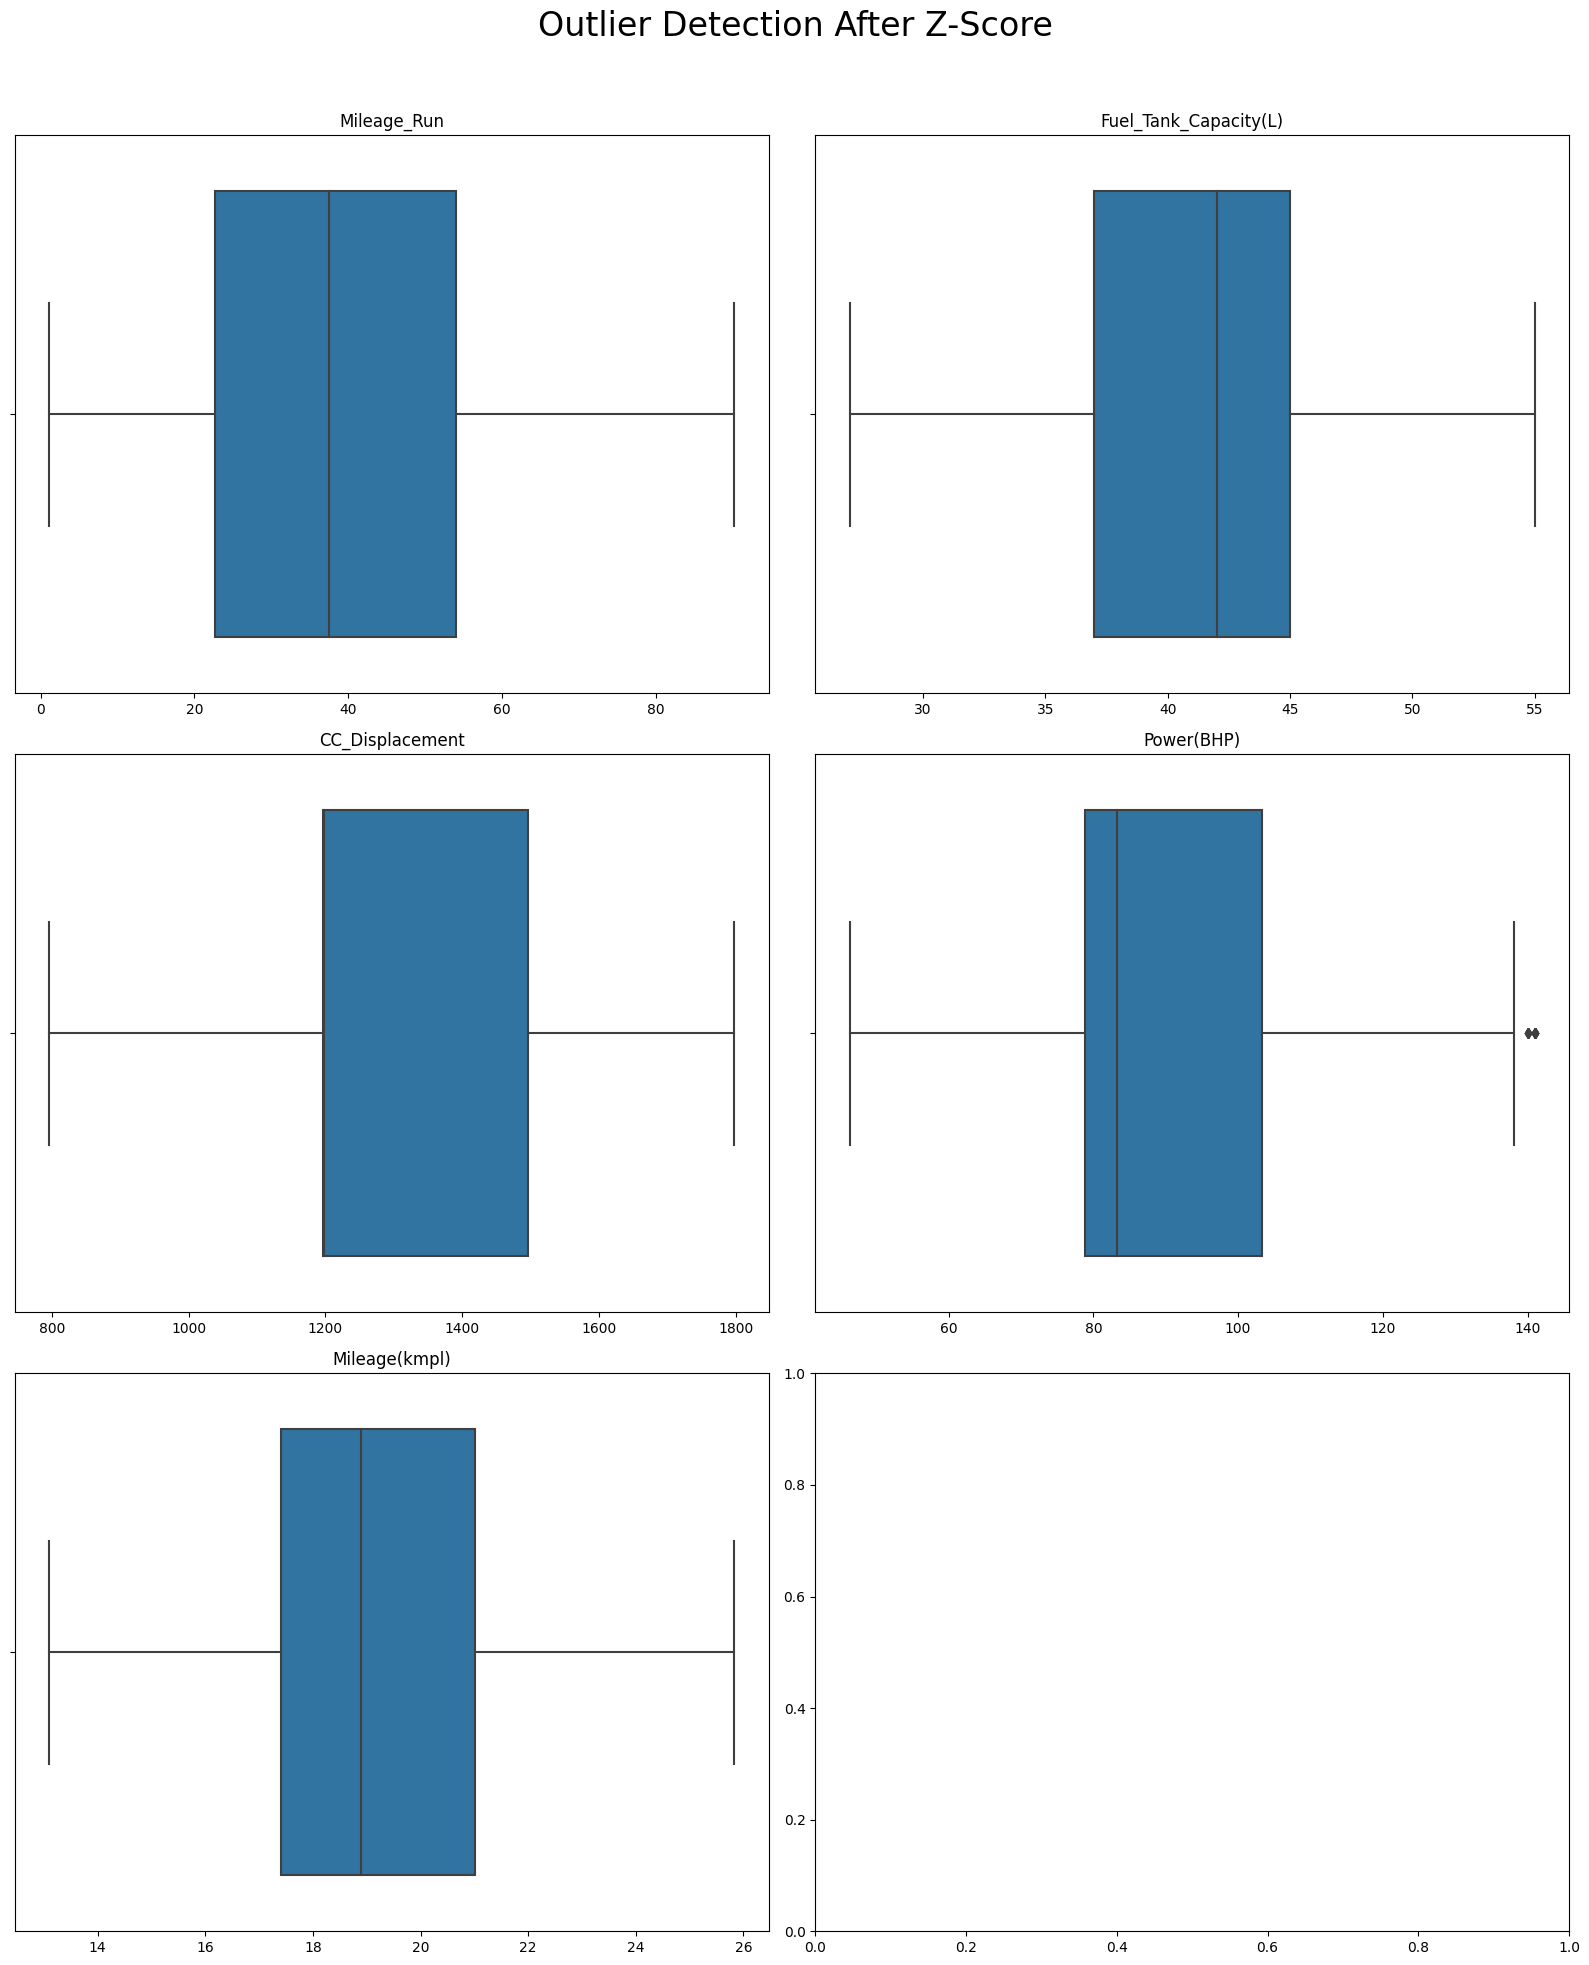

In [41]:
num_cols = [col for col in X_without_outliers.columns if X_without_outliers[col].nunique() > 12 and X_without_outliers[col].dtype in ["float64", "int64"]]

fig, axes = plt.subplots(3, 2, figsize=(16, 20))

for i, feature in enumerate(num_cols):
    row = i // 2
    col = i % 2
    
    sns.boxplot(x = df_without_outliers[feature], ax = axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

fig.suptitle("Outlier Detection After Z-Score", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The number of outliers has noticeably decreased. Now let's build our model with the outlier-corrected dataset and examine the results.

In [42]:
best_params = grid_model.best_params_
best_degree = best_params['polynomialfeatures__degree']
best_alpha = best_params['ridge__alpha']

X = df_without_outliers.drop("Price", axis=1)
y = df_without_outliers["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 142)

pipeline_new = make_pipeline(PolynomialFeatures(degree = best_degree), Ridge(alpha = best_alpha))

y_train_log = np.log(y_train)

pipeline_new.fit(X_train, y_train_log)

y_pred_log_transformed = pipeline_new.predict(X_test)

y_pred_new = np.exp(y_pred_log_transformed)

r2_new = r2_score(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)

print("New model r2 with optimal polynomial features is : ", r2_new)
print("New model mse with optimal polynomial features is : ", mse_new)
print("New model mae is : ", mae_new)

New model r2 with optimal polynomial features is :  0.8538806974421476
New model mse with optimal polynomial features is :  2487613.342863932
New model mae is :  1016.6718797883947


# WHY DID THE MSE INCREASE AND r2 DECREASE AFTER REMOVING OUTLIERS?

Outliers are often a complex and sensitive topic during data analysis and modeling. Outliers are values that differ significantly from the general distribution of the dataset and can sometimes arise from faulty measurements, responses, or other errors. In such cases, outliers usually "pollute" the data and negatively affect the performance of the model, so it may often be best to clip or drop them.

However, it's important to remember that this is not always the case. Sometimes, outliers represent a correct and significant aspect of the data. For example, a particular car brand may be especially expensive because it is a luxury brand, and this could appear as outliers. But removing these outliers from the data or converting them to "average" values could prevent the model from learning that cars from this brand tend to be more expensive.

Therefore, handling outliers requires careful consideration. It's important to understand the reason behind outliers and their place in the data. Determining whether outliers are accidental or represent a real feature is crucial. Understanding whether outliers point to an error or to a real characteristic of the data is important for the data to be accurately represented and for the model to learn the data correctly.

In conclusion, in this dataset, clipping the outliers negatively affected the predictive power of the model because these values reflected the fact that certain car brands tended to be more expensive. This reduced the model's ability to accurately predict these types of cars and lowered the overall performance. Therefore, it's important to be cautious when deciding how to handle outliers. The best approach in each case is to carefully examine the data and understand what the outliers truly signify.

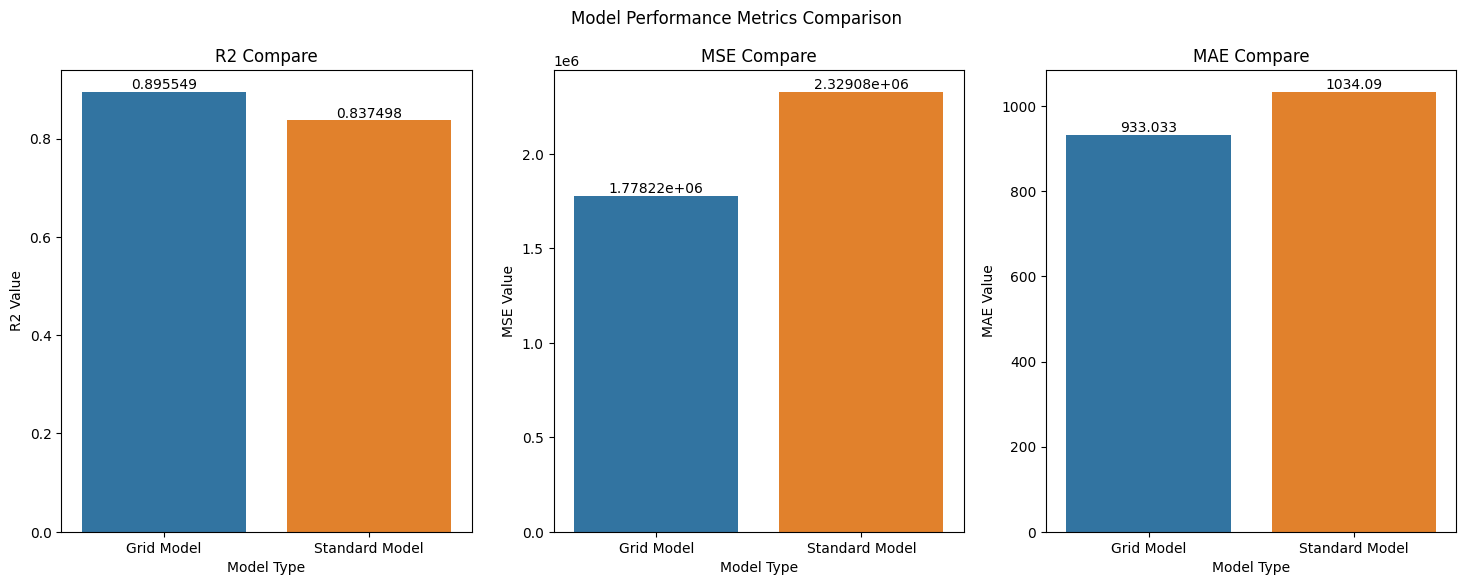

In [55]:
data = {
    'Model Type': ['Grid Model', 'Standard Model'],
    'R2': [0.895549362038622, 0.8374982035664025],
    'MSE': [1778223.6577573265, 2329076.7696410413],
    'MAE': [933.0325304755783, 1034.088048039717]}

df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x = 'Model Type', y = 'R2', data = df, ax = axes[0])
axes[0].set_title('R2 Compare')
axes[0].set_ylabel('R2 Value')
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x = 'Model Type', y = 'MSE', data = df, ax = axes[1])
axes[1].set_title('MSE Compare')
axes[1].set_ylabel('MSE Value')
axes[1].bar_label(axes[1].containers[0])

sns.barplot(x = 'Model Type', y = 'MAE', data = df, ax = axes[2])
axes[2].set_title('MAE Compare')
axes[2].set_ylabel('MAE Value')
axes[2].bar_label(axes[2].containers[0])

plt.suptitle('Model Performance Metrics Comparison')
plt.show()

As evident from the above graphs, we have significantly improved our model's predictive power through optimization techniques. Both regularization and grid search have enabled us to build a model that is not only more efficient but also more generalizable